## I. Problem Statement
Can we predict whether a patient is diabetic based on their medical records?

### PART 2: PYTHON ANALYTICS TASKS 

import all Libraries

In [5]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


In [12]:
# Load dataset
import pandas as pd

df = pd.read_csv("Diabetes.csv")
df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


3.Check Dataset Info

In [13]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [14]:
df.info()
df.describe()
df.isnull().sum()   # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

### 4.Data Cleaning

* Why we did it: Sometimes data has missing or wrong values that can confuse our analysis or model.

* What we did: We filled missing numeric values with the average of the column.

* Expectation: This helps keep the dataset complete without losing too much information.

* Analysis: After this, our data is cleaner and ready for analysis without errors caused by missing data.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Check missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['CLASS'] = le.fit_transform(df['CLASS'])    # Diabetes=1, No Diabetes=0

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Check summary
print(df.info())


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int32  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int32  
dtypes: float64(8), int32(2), i

## 5.Exploratory Data Analysis (EDA)

### 1. Basic statistics (df.describe())
* Why: To get a quick summary of data like average, minimum, maximum, and spread for each number column.

* What: Shows stats for Age, Urea, Cholesterol, BMI, etc.

* Relation: Helps us understand the general health and characteristics of patients.

### 2. Correlation Heatmap
* Why: To see how features relate to each other (if one increases, does the other also increase or decrease?).

* What: Shows positive or negative relationships between variables, like Age and BMI.

* Relation: Helps find patterns or factors linked to diabetes.

### 3. Gender Distribution Plot
* Why: To check how many males and females are in the dataset.

* What: A bar chart showing count of male vs female patients.

* Relation: Understand if gender might affect diabetes risk.

### 4. Diabetes Class Distribution Plot
* Why: To see how many patients have diabetes vs no diabetes.

* What: A bar chart showing the number of cases in each class.

* Relation: Ensures dataset is balanced or if one group is bigger (which may affect modeling).

### 5. Age vs BMI Scatter Plot by Diabetes Class
* Why: To explore if Age and BMI differ between diabetic and non-diabetic patients.

* What: A scatterplot with points colored by diabetes status.

* Relation: Helps visualize if higher BMI or Age is linked to diabetes.



                ID     No_Pation       Gender          AGE         Urea  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05     0.567000    53.528000     5.124743   
std     240.397673  3.380758e+06     0.497754     8.799241     2.935165   
min       1.000000  1.230000e+02     0.000000    20.000000     0.500000   
25%     125.750000  2.406375e+04     0.000000    51.000000     3.700000   
50%     300.500000  3.439550e+04     1.000000    55.000000     4.600000   
75%     550.250000  4.538425e+04     1.000000    59.000000     5.700000   
max     800.000000  7.543566e+07     2.000000    79.000000    38.900000   

                Cr        HbA1c         Chol           TG          HDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     68.943000     8.281160     4.867620     2.349610     1.204750   
std      59.984747     2.534003     1.292606     1.401176     0.660414   
min       6.000000     0.900

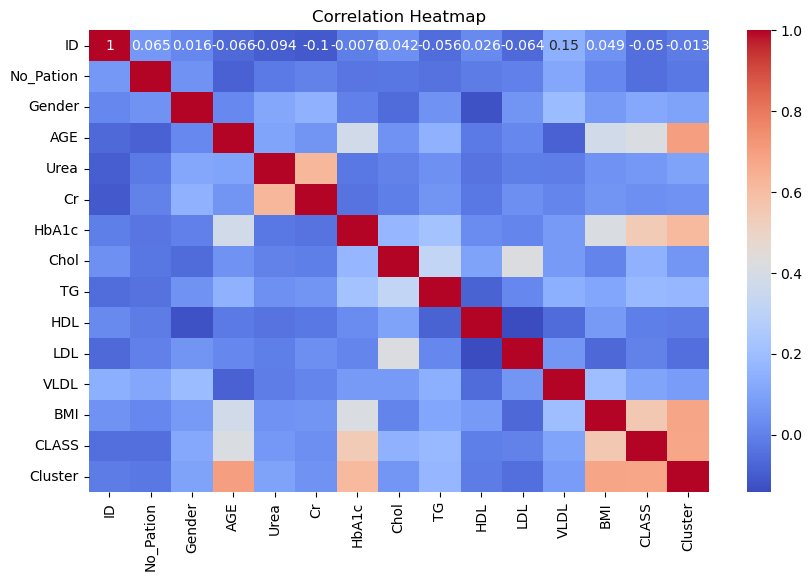

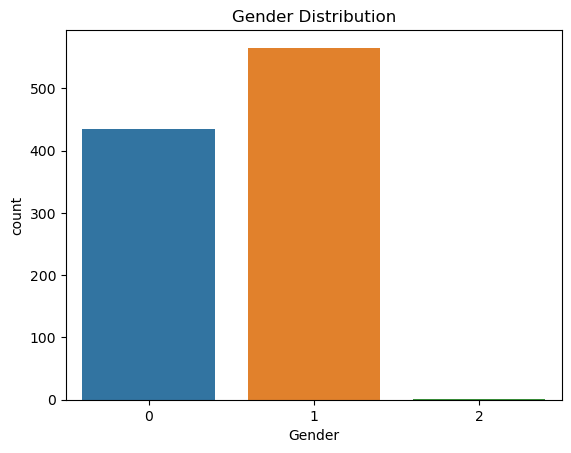

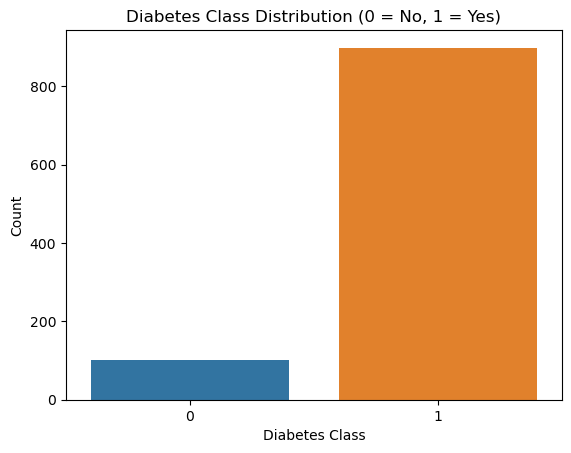

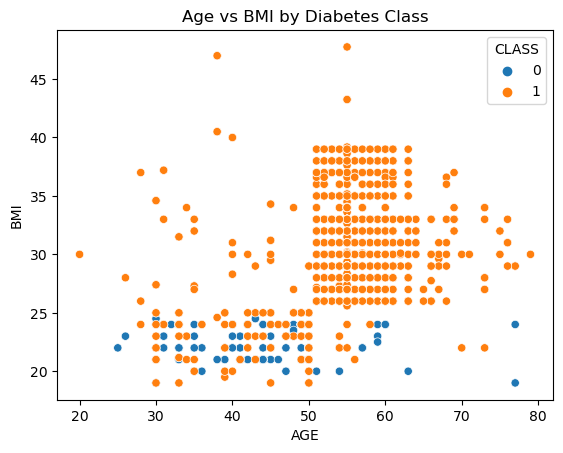

In [32]:
# Basic statistics
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Gender Distribution
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

# Map CLASS values: 0 stays 0, all others become 1 (Diabetes)
df['CLASS'] = df['CLASS'].apply(lambda x: 0 if x == 0 else 1)

# Now plot the class distribution with updated classes (0 and 1)
sns.countplot(x="CLASS", data=df)
plt.title("Diabetes Class Distribution (0 = No, 1 = Yes)")
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.show()


# Age vs BMI Scatter
sns.scatterplot(x="AGE", y="BMI", hue="CLASS", data=df)
plt.title("Age vs BMI by Diabetes Class")
plt.show()


## 4.Feature Scaling & Train-Test Split

### Features and Target:
* We separate the data into inputs (like Age, BMI, cholesterol) called features (X), and the output we want to predict (whether the patient has diabetes or not), called the target (y).

### Scaling Features:
* We use scaling to make sure all the health measurements are on the same scale. This helps the computer understand the data better and improves model performance.

### Train-Test Split:
* We split the data into two parts: one to train the model (learn patterns) and one to test it (check if the model works well on new data). This way, we can see if our model can predict diabetes correctly for patients it hasn’t seen before.







In [20]:
# Features and Target
X = df.drop(["ID", "No_Pation", "CLASS"], axis=1)
y = df["CLASS"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 5.Model Training (Logistic Regression & Random Forest)

### Logistic Regression:
* We used this to predict if a patient has diabetes or not based on their health measurements (like age, BMI, cholesterol). It helps us see how each factor influences the chance of diabetes.

### Random Forest:
* We used this to get better and more reliable predictions by combining many small decision trees. It looks at the health data from different angles to decide if a patient has diabetes, making the prediction stronger than just one model.

In [21]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


## 6.Model Evaluation

### Why we use this code:
This part checks how good our models (Logistic Regression and Random Forest) are at predicting if a patient has diabetes or not.

### Explanation of each step:

#### accuracy_score:
* Measures the percentage of correct predictions out of all predictions. Higher accuracy means the model predicts better.

#### classification_report:
* Shows detailed results like precision, recall, and F1-score for each class (Diabetes or No Diabetes). It tells us how well the model performs for both sick and healthy patients.

#### confusion_matrix:
* Shows a table comparing actual patient status vs predicted status. It helps us see mistakes like false positives (predict diabetes but patient is healthy) or false negatives (predict healthy but patient has diabetes).

#### Seaborn heatmap:
* Draws the confusion matrix as a colored table, making it easy to understand.

#### Plot labels and title:
* Helps explain what the matrix shows — predictions vs actual results.




Model: Logistic Regression
Accuracy: 0.935
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           2       0.50      0.33      0.40         6
           3       0.97      0.97      0.97       172
           4       1.00      0.00      0.00         1

    accuracy                           0.94       200
   macro avg       0.81      0.54      0.54       200
weighted avg       0.93      0.94      0.93       200



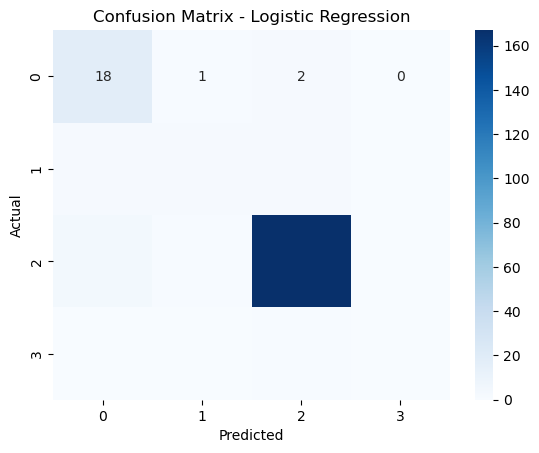


Model: Random Forest
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           2       1.00      1.00      1.00         6
           3       0.99      0.99      0.99       172
           4       1.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.99      0.74      0.74       200
weighted avg       0.99      0.98      0.98       200



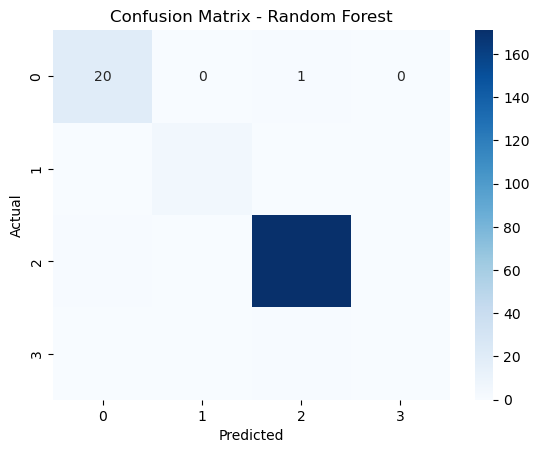

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    # Add zero_division=1 to avoid warnings
    print(classification_report(y_true, y_pred, zero_division=1))
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Random Forest", y_test, rf_preds)


## 7.Clustering (KMeans )

### Why we used it:
We used KMeans clustering to group patients into 2 clusters based on their Age and BMI.
It helps us see if patients naturally form groups (for example, young with healthy BMI vs older with high BMI) without using the diabetes label.

### Step-by-step meaning:
#### KMeans(n_clusters=2):
* We tell the algorithm to divide patients into 2 groups (clusters).

#### fit_predict(X_scaled):
* It looks at all patient data and assigns each patient to a cluster.

#### df['Cluster'] = clusters:
* We add a new column to our table showing which cluster each patient belongs to.

#### sns.scatterplot(...):
* We draw a graph of Age vs BMI, with colors showing the 2 clusters.

### Relation to our problem:
This helps us find patterns in patients even without knowing if they have diabetes.
For example, we might discover that Cluster 1 has mostly older patients with high BMI (more risk) while Cluster 0 has younger patients with normal BMI (less risk).

It gives extra insights that models alone cannot show.

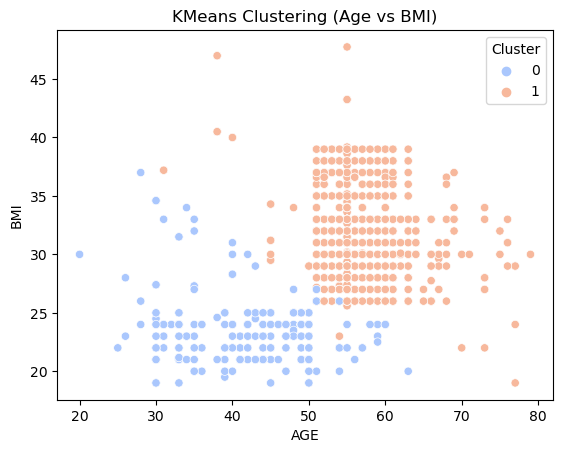

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
sns.scatterplot(x=df['AGE'], y=df['BMI'], hue=df['Cluster'], palette="coolwarm")
plt.title("KMeans Clustering (Age vs BMI)")
plt.show()


 ## 8. Feature Importance (Innovation)
### Why we used it:
We want to know which features (like Age, BMI, Cholesterol) are most important for predicting diabetes.

#### What it does:
##### rf_model.feature_importances_:
* Gets how much each feature helped the Random Forest model make correct predictions.

#### pd.Series(...).sort_values():
* Creates a list of features sorted from most to least important.

#### plot(kind='bar'):
* Draws a bar chart showing which features matter the most.

### Relation to our problem:
This tells us which patient data (like Age or Cholesterol) influences diabetes risk the most.
Knowing this helps doctors and us focus on the most critical factors in diabetes prediction.









Ask ChatGPT


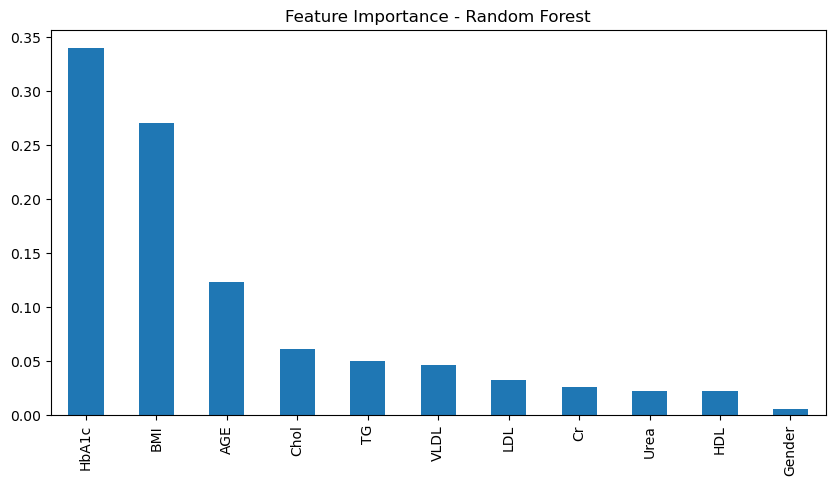

In [29]:
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(10,5), title="Feature Importance - Random Forest")
plt.show()


In [30]:
df.to_csv("cleaned_diabetes_dataset.csv", index=False)
print(" Cleaned dataset saved for Power BI!")


 Cleaned dataset saved for Power BI!
